# Проект по продвинутому SQL

В самостоятельном проекте работать предстояло с версией базы данных StackOverflow — сервиса вопросов и ответов о программировании,  где хранятся данные о постах за 2008 год, но в таблицах есть информация и о более поздних оценках, которые эти посты получили. 

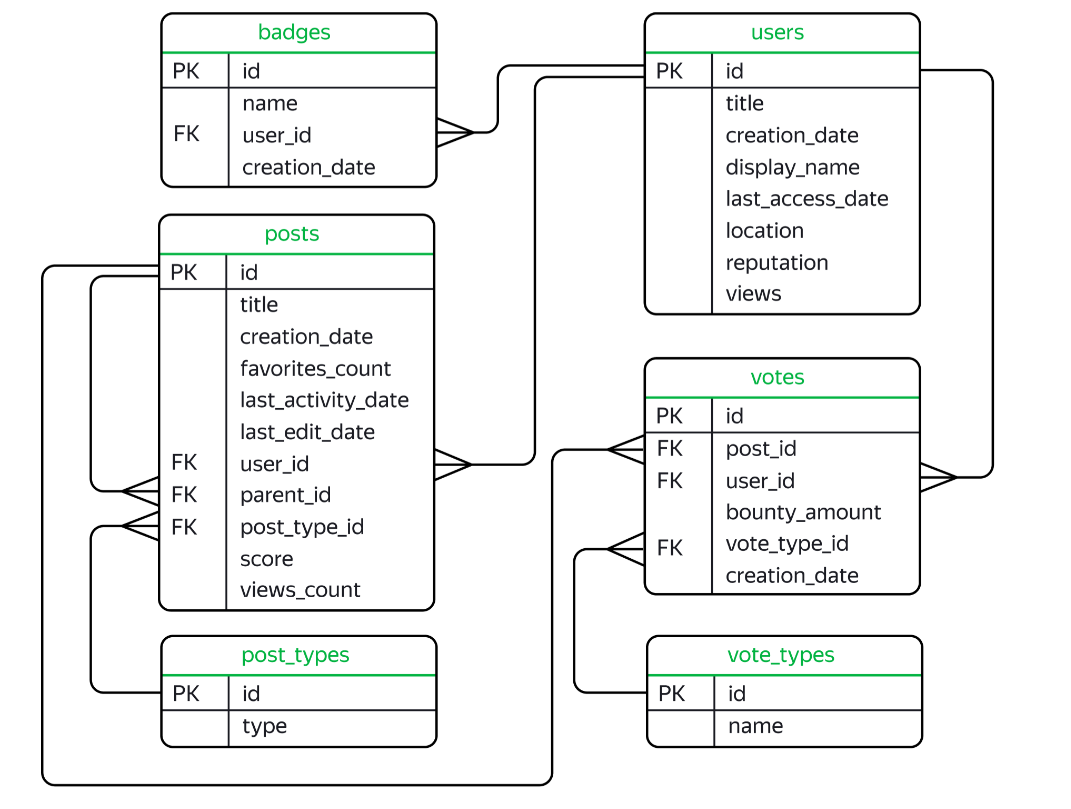

`badges`

Хранит информацию о значках, которые присуждаются за разные достижения. Например, пользователь, правильно ответивший на большое количество вопросов про PostgreSQL, может получить значок postgresql.

* `id` - Идентификатор значка, первичный ключ таблицы
* `name` - Название значка
* `user_id` - Идентификатор пользователя, которому присвоили значок, внешний ключ, отсылающий к таблице `users`
* `creation_date` - Дата присвоения значка

---

`post_types`

Содержит информацию о типе постов. Их может быть два:

             `Question` — пост с вопросом;
             `Answer` — пост с ответом.

* `id` - Идентификатор поста, первичный ключ таблицы
* `type` - Тип поста

---

`posts`

Содержит информацию о постах.

* `id` - Идентификатор поста, первичный ключ таблицы
* `title` - Заголовок поста
* `creation_date` - Дата создания поста
* `favorites_count` - Число, которое показывает, сколько раз пост добавили в «Закладки»
* `last_activity_date` - Дата последнего действия в посте, например комментария
* `last_edit_date` - Дата последнего изменения поста
* `user_id` - Идентификатор пользователя, который создал пост, внешний ключ к таблице `users`
* `parent_id` - Если пост написали в ответ на другую публикацию, в это поле попадёт идентификатор поста с вопросом
* `post_type_id` - Идентификатор типа поста, внешний ключ к таблице `post_types`
* `score` - Количество очков, которое набрал пост
* `views_count` - Количество просмотров

--- 

`users`

Содержит информацию о пользователях.

* `id` - Идентификатор пользователя, первичный ключ таблицы
* `creation_date` - Дата регистрации пользователя
* `display_name` - Имя пользователя
* `last_access_date` - Дата последнего входа
* `location` - Местоположение
* `reputation` - Очки репутации, которые получают за хорошие вопросы и полезные ответы
* `views` - Число просмотров профиля пользователя

---

`vote_types`

Содержит информацию о типах голосов. Голос — это метка, которую пользователи ставят посту. Типов бывает несколько:

    `UpMod` — такую отметку получают посты с вопросами или ответами, которые пользователи посчитали уместными и полезными.  
    `DownMod` — такую отметку получают посты, которые показались пользователям наименее полезными.  
    `Close` — такую метку ставят опытные пользователи сервиса, если заданный вопрос нужно доработать или он вообще не подходит для платформы.  
    `Offensive` — такую метку могут поставить, если пользователь ответил на вопрос в грубой и оскорбительной манере, например, указав на неопытность автора поста.  
    `Spam` — такую метку ставят в случае, если пост пользователя выглядит откровенной рекламой.
    
* `id` - Идентификатор типа голоса, первичный ключ
* `name` - Название метки

---

`votes`

Содержит информацию о голосах за посты.

* `id` - Идентификатор голоса, первичный ключ
* `post_id` - Идентификатор поста, внешний ключ к таблице `posts`
* `user_id` - Идентификатор пользователя, который поставил посту голос, внешний ключ к таблице `users`
* `bounty_amount` - Сумма вознаграждения, которое назначают, чтобы привлечь внимание к посту
* `vote_type_id` - Идентификатор типа голоса, внешний ключ к таблице `vote_types`
* `creation_date` - Дата назначения голоса


# Задачи. Часть первая.

# 1.
Найдите количество вопросов, которые набрали больше 300 очков или как минимум 100 раз были добавлены в «Закладки».

```SQL
SELECT COUNT(posts)
FROM stackoverflow.posts 
WHERE (score > 300 or favorites_count >=100)
AND post_type_id IN (
SELECT id
FROM stackoverflow.post_types
WHERE type ='Question') 
```

# 3.


Сколько пользователей получили значки сразу в день регистрации? Выведите количество уникальных пользователей.

```SQL
SELECT COUNT(DISTINCT user_id)
FROM stackoverflow.badges 
JOIN stackoverflow.users ON stackoverflow.badges.creation_date::date = stackoverflow.users.creation_date::date
AND stackoverflow.badges.user_id = stackoverflow.users.id
```

# 4.


Сколько уникальных постов пользователя с именем `Joel Coehoorn` получили хотя бы один голос?

```SQL
SELECT COUNT(*) 
FROM stackoverflow.posts
WHERE user_id IN(
SELECT id 
FROM stackoverflow.users 
WHERE display_name = 'Joel Coehoorn')
AND id IN (
SELECT post_id
FROM stackoverflow.votes)
```

# 5.



Выгрузите все поля таблицы `vote_types`. Добавьте к таблице поле `rank`, в которое войдут номера записей в обратном порядке. Таблица должна быть отсортирована по полю `id`.

```SQL
SELECT *,
RANK() OVER(ORDER BY id DESC)
FROM stackoverflow.vote_types

```

# 6.

Отберите 10 пользователей, которые поставили больше всего голосов типа `Close`. Отобразите таблицу из двух полей: идентификатором пользователя и количеством голосов. Отсортируйте данные сначала по убыванию количества голосов, потом по убыванию значения идентификатора пользователя.

```SQL
SELECT user_id,
COUNT(id) OVER(partition by user_id)
FROM stackoverflow.votes
WHERE vote_type_id IN(
SELECT id
FROM stackoverflow.vote_types
WHERE name = 'Close')
ORDER BY 2 DESC, 1 DESC
LIMIT 10
```

# 7.

Отберите 10 пользователей по количеству значков, полученных в период с 15 ноября по 15 декабря 2008 года включительно. Отобразите несколько полей:

* идентификатор пользователя;
* число значков;
* место в рейтинге — чем больше значков, тем выше рейтинг.

Пользователям, которые набрали одинаковое количество значков, присвойте одно и то же место в рейтинге.
Отсортируйте записи по количеству значков по убыванию, а затем по возрастанию значения идентификатора пользователя.

```SQL
SELECT user_id,
COUNT(id),
DENSE_RANK() OVER(ORDER BY COUNT(id) DESC)
FROM stackoverflow.badges
WHERE creation_date::date BETWEEN '2008-11-15' AND '2008-12-15'
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10
```

# 8.

Сколько в среднем очков получает пост каждого пользователя?
Сформируйте таблицу из следующих полей:

* заголовок поста;
* идентификатор пользователя;
* число очков поста;
* среднее число очков пользователя за пост, округлённое до целого числа.

Не учитывайте посты без заголовка, а также те, что набрали ноль очков.

```SQL
SELECT title,
user_id,
score,
ROUND(AVG(score) OVER(PARTITION BY user_id))
FROM stackoverflow.posts
WHERE title <>'' AND score <>0
```

# 9.

Отобразите заголовки постов, которые были написаны пользователями, получившими более 1000 значков. Посты без заголовков не должны попасть в список.

```SQL
SELECT title
FROM stackoverflow.posts
WHERE user_id IN(
SELECT user_id
FROM stackoverflow.badges
GROUP BY 1
HAVING COUNT(id) >1000)
AND title <> ''
```

# 10.

Напишите запрос, который выгрузит данные о пользователях из США (англ. United States). Разделите пользователей на три группы в зависимости от количества просмотров их профилей:

* пользователям с числом просмотров больше либо равным 350 присвойте группу `1`;
* пользователям с числом просмотров меньше 350, но больше либо равно 100 — группу `2`;
* пользователям с числом просмотров меньше 100 — группу `3`.

Отобразите в итоговой таблице идентификатор пользователя, количество просмотров профиля и группу. Пользователи с нулевым количеством просмотров не должны войти в итоговую таблицу.

```SQL
SELECT id,
views,

CASE WHEN views>=100 and views <350 THEN 2
WHEN views>=350 THEN 1
ELSE 3 END
FROM stackoverflow.users
WHERE location LIKE '%United States%' AND views <>0
```

# 11.

Дополните предыдущий запрос. Отобразите лидеров каждой группы — пользователей, которые набрали максимальное число просмотров в своей группе. Выведите поля с идентификатором пользователя, группой и количеством просмотров. Отсортируйте таблицу по убыванию просмотров, а затем по возрастанию значения идентификатора.

```SQL
WITH timetable as(
SELECT id,
views,
(CASE WHEN views>=100 and views <350 THEN 2 
WHEN views>=350 THEN 1
ELSE 3 END) AS grouped
FROM stackoverflow.users
WHERE location LIKE '%United States%' AND views <>0),

leaders as (SELECT grouped,
MAX(views) as maxes
FROM  timetable
GROUP BY 1)

SELECT id,
grouped,
views
FROM  timetable
WHERE views IN(
SELECT maxes
FROM leaders)
ORDER BY views DESC, id
```

# 12.

Посчитайте ежедневный прирост новых пользователей в ноябре 2008 года. Сформируйте таблицу с полями:

* номер дня;
* число пользователей, зарегистрированных в этот день;
* сумму пользователей с накоплением.

```SQL
SELECT EXTRACT(DAY FROM creation_date),
COUNT(*),
SUM(COUNT(*)) OVER(ORDER BY EXTRACT(DAY FROM creation_date))
FROM stackoverflow.users
WHERE creation_date::date BETWEEN '2008-11-01' AND '2008-11-30'
GROUP BY 1
```

# 13.

Для каждого пользователя, который написал хотя бы один пост, найдите интервал между регистрацией и временем создания первого поста. Отобразите:

* идентификатор пользователя;
* разницу во времени между регистрацией и первым постом.

```SQL
SELECT DISTINCT p.user_id,
FIRST_VALUE(p.creation_date) OVER(PARTITION BY user_id ORDER BY p.creation_date) - u.creation_date
FROM stackoverflow.posts p
JOIN stackoverflow.users u ON u.id = p.user_id
```

# Задачи. Часть вторая.

# 1.

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

```SQL
SELECT DATE_TRUNC('month', creation_date)::date,
SUM(views_count)
FROM stackoverflow.posts
WHERE EXTRACT(YEAR FROM creation_date)='2008'
GROUP BY 1
ORDER BY 2 DESC
```

# 2.

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

```SQL
SELECT COUNT(*)
FROM (SELECT u.display_name
FROM stackoverflow.posts p
JOIN stackoverflow.users u ON p.user_id = u.id
JOIN stackoverflow.post_types pt ON p.post_type_id = pt.id
WHERE p.creation_date::date BETWEEN u.creation_date::date AND u.creation_date::date + INTERVAL '1 month'
and pt.type = 'Answer'
GROUP BY 1
HAVING COUNT(p.id)>100) a
```

# 3.


Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

```SQL
SELECT DATE_TRUNC('month',creation_date)::date,
COUNT(id)
FROM stackoverflow.posts 
WHERE user_id IN (SELECT user_id
FROM stackoverflow.posts p
JOIN stackoverflow.users u ON p.user_id = u.id
WHERE DATE_TRUNC('month',u.creation_date)::date = '2008-09-01'
AND DATE_TRUNC('month',p.creation_date)::date = '2008-12-01')
GROUP BY 1
ORDER BY 1 DESC
```

# 4.

Используя данные о постах, выведите несколько полей:

* идентификатор пользователя, который написал пост;
* дата создания поста;
* количество просмотров у текущего поста;
* сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

```SQL
SELECT user_id,
creation_date,
views_count,
SUM(views_count) OVER(PARTITION BY user_id ORDER BY creation_date)
FROM stackoverflow.posts
ORDER BY user_id, creation_date
```

# 5.


Сколько в среднем дней в период с 1 по 7 декабря 2008 года включительно пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат.

```SQL
SELECT ROUND(AVG(days))
FROM(
SELECT user_id,
COUNT(DISTINCT creation_date::date) days
FROM stackoverflow.posts
WHERE creation_date::date BETWEEN '2008-12-01' AND '2008-12-07'
GROUP BY 1) a
```

# 6.


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

* номер месяца;
* количество постов за месяц;
* процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.
Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

```SQL
SELECT *,
ROUND((((posts::numeric / LAG(posts) OVER(ORDER BY months)::numeric))-1)*100,2)
FROM (SELECT EXTRACT(MONTH FROM creation_date) months,
COUNT(*) posts
FROM stackoverflow.posts
      WHERE creation_date::date BETWEEN '2008-09-01' AND '2008-12-31'
GROUP BY 1) a
```

# 7.

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

* номер недели;
* дата и время последнего поста, опубликованного на этой неделе.

```SQL
SELECT distinct week,
LAST_VALUE(dates) OVER(PARTITION BY week ORDER BY dates ROWS BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING)
FROM (SELECT user_id,
      EXTRACT(WEEK FROM creation_date) week,
creation_date dates
FROM stackoverflow.posts
WHERE user_id =(select user_id from (SELECT user_id,
COUNT(*)
FROM stackoverflow.posts
GROUP BY 1
ORDER BY 2 DESC
LIMIT 1) a) AND  creation_date::date BETWEEN '2008-10-01' AND '2008-10-31' ) b

```